In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
os.listdir("Data/")

['tmdb_api_results_2010.json',
 'title-ratings.csv',
 'movies erd.png',
 'title.basics.tsv.gz',
 'tmdb_api_results_2001.json',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'movies.sql',
 'title.ratings.tsv.gz',
 'tmdb_api_results_2002.json',
 'title-akas-us-only.csv',
 'movies erd.mwb',
 'final_tmdb_data_2001.csv.gz',
 '.ipynb_checkpoints',
 'title-basics.csv']

In [3]:
df_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

df_2002 = pd.read_csv('Data/final_tmdb_data_2002.csv.gz')

In [4]:
df = pd.concat([df_2001,df_2002])
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.331,1226.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,tt0116916,0.0,/rFpHBidSlhjflmnLu7BZilyKeQR.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,73549.0,en,The Dark Mist,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Dark Mist,0.0,3.500,2.0,PG
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.442,130.0,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,tt6449044,0.0,/a9pkw8stijESGx1flSGPqcXLkHu.jpg,"{'id': 957260, 'name': 'The Conman Collection'...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,314105.0,cn,賭俠2002,...,0.0,97.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,The Conman 2002,0.0,4.300,3.0,NaN
1285,tt6694126,0.0,/sXjVpTZyDvwzPVZve3AmyCUBeHk.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,819174.0,fa,عروس خوش‌قدم,...,0.0,101.0,"[{'english_name': 'Persian', 'iso_639_1': 'fa'...",Released,NaN,The Lucky Bride,0.0,8.000,1.0,NaN
1286,tt8302928,0.0,NaN,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,866533.0,el,Movie Toons: Treasure Island,...,0.0,0.0,[],Released,NaN,Movie Toons: Treasure Island,0.0,0.000,0.0,NaN
1287,tt8474326,0.0,NaN,NaN,0.0,[],NaN,292027.0,en,Skin Eating Jungle Vampires,...,0.0,0.0,[],Released,NaN,Skin Eating Jungle Vampires,0.0,0.000,0.0,NaN


## How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.

In [5]:
filter_financial = (df['budget'] > 0) | (df['revenue']>0)
filter_financial.value_counts()

False    1913
True      724
dtype: int64

Text(0.5, 1.0, '# of Movies with Valid Financial Data')

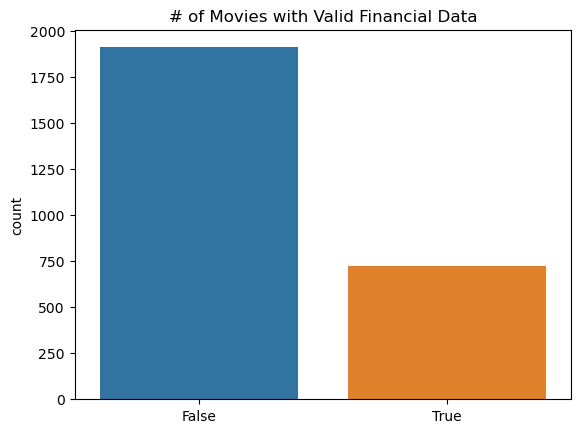

In [6]:
ax = sns.countplot(x=filter_financial)
ax.set_title('# of Movies with Valid Financial Data')

In [7]:
plot_df = df[filter_financial].copy()

## How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [8]:
## to order them (optional)
cert_order = ['G','PG','PG-13','R','NR']#,'NC-17']

In [9]:
plot_df.groupby('certification')['certification'].count()

certification
G         15
NR        23
PG        41
PG-13    147
R        247
Name: certification, dtype: int64

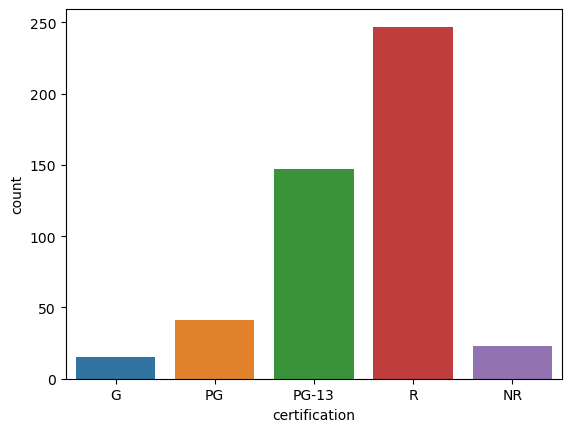

In [10]:
sns.countplot(data=plot_df, x='certification',order=cert_order);

In [11]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## What is the average revenue per certification category?

In [12]:
plot_df.groupby('certification')['revenue'].mean()

certification
G       109652085.200
NR        3063780.478
PG      158388995.439
PG-13    98528885.102
R        30516072.316
Name: revenue, dtype: float64

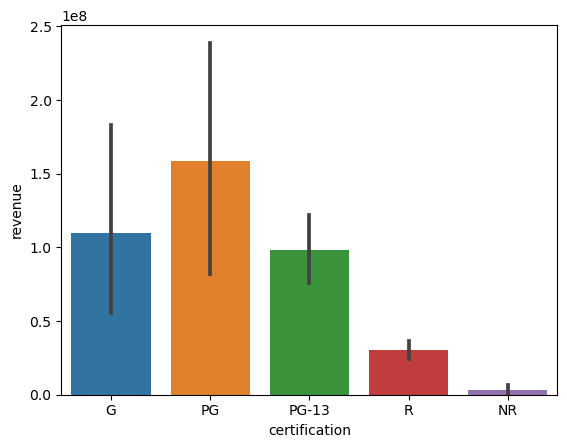

In [13]:
sns.barplot(data=plot_df, x='certification',y='revenue', order=cert_order);

## What is the average budget per certification category?

In [14]:
plot_df.groupby('certification')['budget'].mean()

certification
G       35066666.667
NR       1529652.217
PG      43285908.049
PG-13   39035298.204
R       19172957.591
Name: budget, dtype: float64

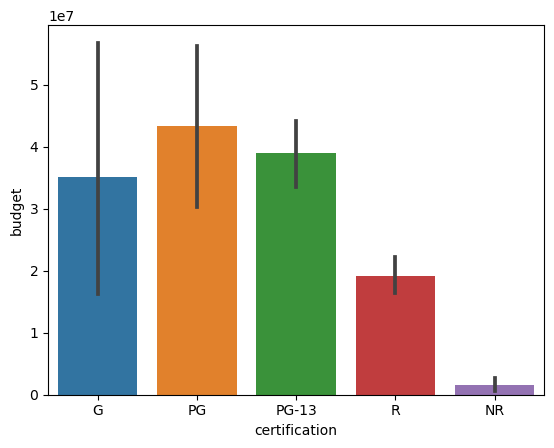

In [15]:
sns.barplot(data=plot_df, x='certification',y='budget', order=cert_order);